### RNA-Seq Analysis

 ### Installation of Packages

* hisat2
* samtools
* featureCounts

 ### Analysis

**Extracting Splice Sites**

In [ ]:
$ hisat2_extract_splice_sites.py chr22_with_ERCC92.gtf > splicesites.tsv #Extracting Splice Sites
$ hisat2_extract_exons.py chr22_with_ERCC92.gtf > exons.tsv #Extracting Exon Sites

**Indexing The Reference Genome**

In [ ]:
$ hisat2-build -p 8 --ss splicesites.tsv --exon exons.tsv chr22_with_ERCC92.fa index

**Checking the Output Files**

In [ ]:
$ ls

**Output:**

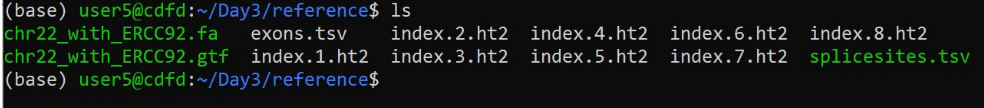

* Output for splice site extraction - splicesites.tsv
* Output for exon site extraction - exons.tsv
* Output for indexing - 8 files by the name of index with ht2 extestion

### Walking through the raw data

In [ ]:
$ ls
$ cd raw_data
$ ls

**Output:**
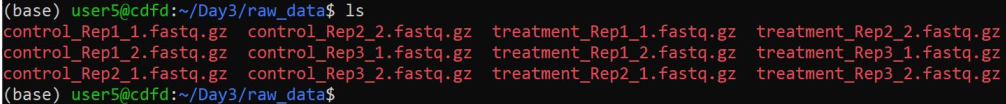

### Alignment for Control Samples

In [ ]:
$ cd
$ mkdir alignment

**Control Rep1, Rep2 and Rep3**

In [ ]:
$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/control_Rep1_1.fastq.gz -2 
raw_data/control_Rep1_2.fastq.gz -S alignment/control_Rep1.sam

$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/control_Rep2_1.fastq.gz -2 
raw_data/control_Rep2_2.fastq.gz -S alignment/control_Rep2.sam

$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/control_Rep3_1.fastq.gz -2 
raw_data/control_Rep3_2.fastq.gz -S alignment/control_Rep3.sam

**Output:**
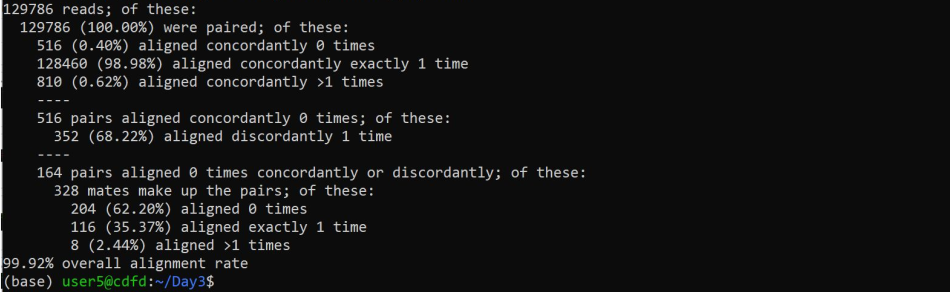

### Alignment for Treatment Samples

**Treatment Rep1, Rep2 and Rep3**

In [ ]:
$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/treatment_Rep1_1.fastq.gz -2 
raw_data/treatment_Rep1_2.fastq.gz -S alignment/treatment_Rep1.sam

$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/treatment_Rep2_1.fastq.gz -2 
raw_data/treatment_Rep2_2.fastq.gz -S alignment/treatment_Rep2.sam

$ hisat2 -p 4 -x reference/index --dta --rna-strandness RF -1 raw_data/treatment_Rep3_1.fastq.gz -2 
raw_data/treatment_Rep3_2.fastq.gz -S alignment/treatment_Rep3.sam

### Checking the Results

In [ ]:
$ cd alignment
$ ls

**Output:**
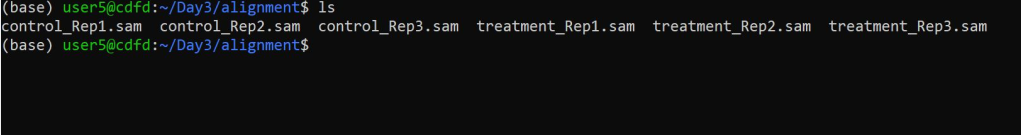

Output - 6 .sam files from output of each replicate alignment

### Checking the .sam files

In [ ]:
$ head -20 control_Rep1.sam #Header Portion
$ tail -20 control_Rep1.sam #Alignment Portion

### Converting the .sam to sorted .bam files

In [ ]:
$ samtools sort -@ 4 -o control_Rep1.bam control_Rep1.sam #control_Rep1.sam to control_Rep1.bam
$ samtools sort -@ 4 -o control_Rep2.bam control_Rep2.sam #control_Rep2.sam to control_Rep2.bam
$ samtools sort -@ 4 -o control_Rep3.bam control_Rep3.sam #control_Rep3.sam to control_Rep3.bam

$ samtools sort -@ 4 -o treatment_Rep1.bam treatment_Rep1.sam #reatment_Rep1.sam to treatment_Rep1.bam 
$ samtools sort -@ 4 -o treatment_Rep2.bam treatment_Rep2.sam #treatment_Rep2.sam to treatment_Rep2.bam
$ samtools sort -@ 4 -o treatment_Rep3.bam treatment_Rep3.sam #treatment_Rep3.sam to treatment_Rep3.bam

**Check the output:**

In [ ]:
$ ls

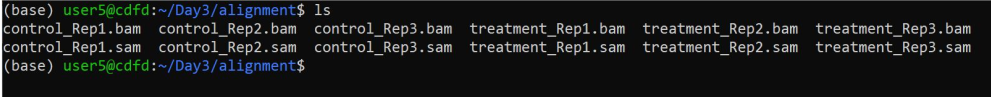
Output: 6 .bam files should be present along with the pre-existing .sam files

### Alignment Output Indexing

In [ ]:
$ samtools index control_Rep1.bam #control_Rep1.bam
$ samtools index control_Rep2.bam #control_Rep2.bam
$ samtools index control_Rep3.bam #control_Rep3.bam

$ samtools index treatment_Rep1.bam #treatment_Rep1.bam
$ samtools index treatment_Rep2.bam #treatment_Rep2.bam
$ samtools index treatment_Rep3.bam #treatment_Rep3.bam

**Check the output:**

In [ ]:
$ ls

**Output:**
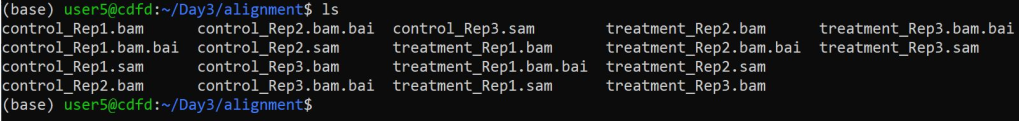
Output - In addition to the 6 .bam and .sam files, there would be an additional 6 .bam.bai files as well

In [ ]:
$ rm *.sam

**Output:** bam + .bam.bai
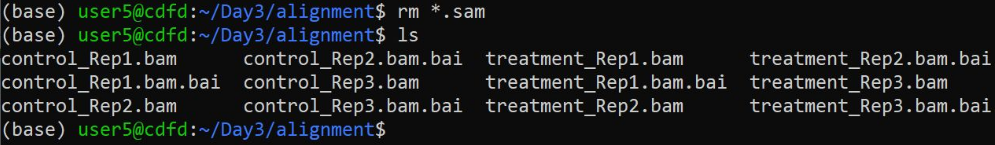

### Read Count Generation

In [ ]:
$ mkdir read_counts

In [ ]:
$ featureCounts -T 10 -p -s 2 -t exon -g gene_id -a reference/chr22_with_ERCC92.gtf 
-o read_counts/readcount.txt alignment/*.bam

**Checking Read Count Results**

In [ ]:
$ ls
$ cd read_counts
$ ls

**Output:**
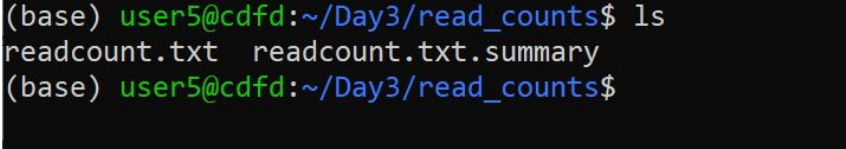

In [ ]:
$ head readcount.txt

Done | **Thank you**, Our next part of analysis will be: **DESeq2 Analysis**